In [1]:
import pandas as pd
import sqlalchemy
from matplotlib import pyplot as plt
import datetime
import copy
import numpy as np


In [2]:
db = sqlalchemy.engine.url.URL(drivername='mysql',
                               host='127.0.0.1',
                               database='sherman_1',
                               query={'read_default_file': '~/.my.cnf', 'charset': 'utf8'})
engine = sqlalchemy.create_engine(db)

In [3]:
df = pd.read_sql('''
    SELECT * FROM sherman_1.aware_device;
''' ,engine)

In [4]:
df['date'] = pd.to_datetime(df['timestamp'],unit='ms').dt.date

In [5]:
df = df[['device_id','date']]

In [6]:
def find_first_day(device_id, df_cleaned):
    df_target = df_cleaned[df_cleaned['device_id']==device_id]
    return min(df_target['date'])

In [7]:
first_day = {device_id: find_first_day(device_id, df)
             for device_id in set(df['device_id'].tolist())
             if find_first_day(device_id, df) >= datetime.date(year=2022, month=11, day=11)}


In [8]:
df = pd.DataFrame(first_day.items(),columns=['device_id', 'date'])

In [11]:
df.to_csv('ad.csv', index=False)

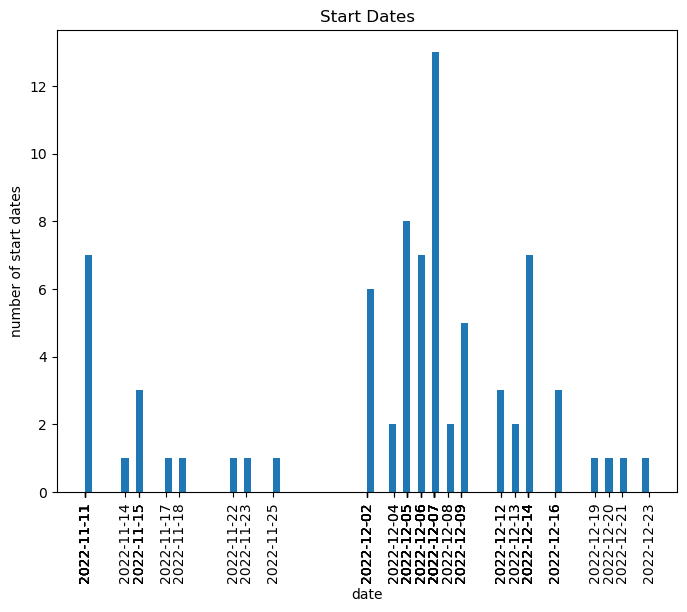

In [10]:
fig = plt.figure(figsize=(8, 6))
plt.hist(df['date'],bins=len(df))
plt.xlabel('date')
plt.ylabel('number of start dates')
plt.title('Start Dates')
plt.xticks(df['date'],rotation=90)
plt.show()